In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("sales.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [3]:
df.shape
# the data has 14 columns and 1000 rows

(1000, 14)

In [4]:
df.info()
# their area 14 columns in data
# every columns has 1000 rows with 1000 non-null values
# 7 object values ( Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Ship Date)
# 2 integer ( Order ID, Units Sold)
# 5 float values (Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [5]:
df.describe()

# units sold is left skewed data                                 negatively skewed
# total revenue is left skewes data                              negatively skewed


# total cost and total profit are right skewed data              positively skewed
# unit price and unit cost are right skewed data                 positively skewed

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


In [6]:
df["Item Type"].unique()

# showing the values that are repeatedly in the column

array(['Cosmetics', 'Vegetables', 'Baby Food', 'Cereal', 'Fruits',
       'Clothes', 'Snacks', 'Household', 'Office Supplies', 'Beverages',
       'Personal Care', 'Meat'], dtype=object)

In [7]:
iloc_object=df.iloc[:,:4]
iloc_object

# below are the columns that have data type as object
# creating a new data named as iloc_object

,Region,Country,Item Type,Sales Channel
0,Middle East and North Africa,Libya,Cosmetics,Offline
1,North America,Canada,Vegetables,Online
2,Middle East and North Africa,Libya,Baby Food,Offline
3,Asia,Japan,Cereal,Offline
4,Sub-Saharan Africa,Chad,Fruits,Offline
...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline
996,Europe,Georgia,Baby Food,Offline
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online
998,Europe,Finland,Household,Offline


In [8]:
iloc_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         1000 non-null   object
 1   Country        1000 non-null   object
 2   Item Type      1000 non-null   object
 3   Sales Channel  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [9]:
df["Item Type"].value_counts()

Beverages          101
Vegetables          97
Office Supplies     89
Baby Food           87
Personal Care       87
Snacks              82
Cereal              79
Clothes             78
Meat                78
Household           77
Cosmetics           75
Fruits              70
Name: Item Type, dtype: int64

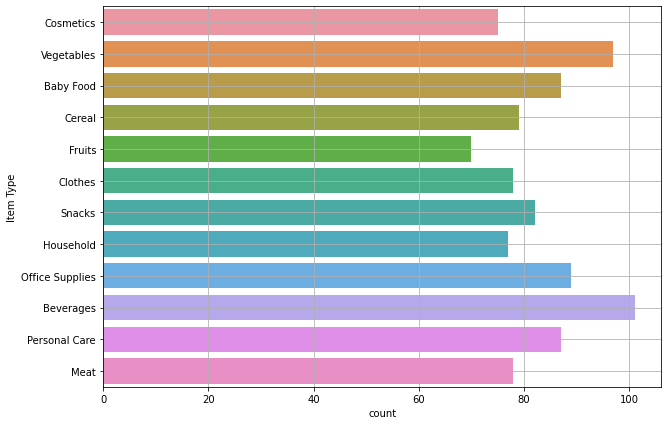

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,y="Item Type")
plt.grid()

# below chart is count of items type sale in years from 2010 to 2017
# there are 12 item types in the data and their all object datatype
# the most sale item is Beverages
# baby food &  personal care have the same number of sales (87)
# clothes and meat also have the same number of sales (78)
# the sales beverages, vegetables, office supplies, baby food & personal care, snacks, cereal, clothes & meat,
# household, cosmetics, fruits

In [11]:
counts_sales=df.groupby("Sales Channel")["Item Type"].count()
counts_sales

# we are only counting the total number of item sale in offline and online

Sales Channel
Offline    520
Online     480
Name: Item Type, dtype: int64

<AxesSubplot:ylabel='Item Type'>

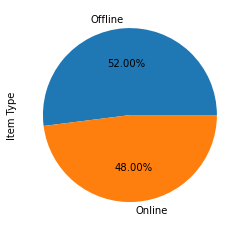

In [12]:
counts_sales.plot(kind="pie",autopct="%.2f%%")

# the most sales of the products are offline compared to online
# the offline sales are around 52% 
# the online sales are around 48%

In [13]:
value_count_channel=df.groupby("Sales Channel")["Item Type"].value_counts().sort_values()
value_count_channel

Sales Channel  Item Type      
Online         Cosmetics          27
               Clothes            31
               Snacks             32
               Meat               33
Offline        Household          33
Online         Fruits             34
               Cereal             35
Offline        Fruits             36
               Vegetables         39
               Baby Food          40
Online         Personal Care      42
Offline        Cereal             44
               Office Supplies    44
Online         Household          44
Offline        Personal Care      45
               Meat               45
Online         Office Supplies    45
               Baby Food          47
Offline        Clothes            47
               Cosmetics          48
               Beverages          49
               Snacks             50
Online         Beverages          52
               Vegetables         58
Name: Item Type, dtype: int64

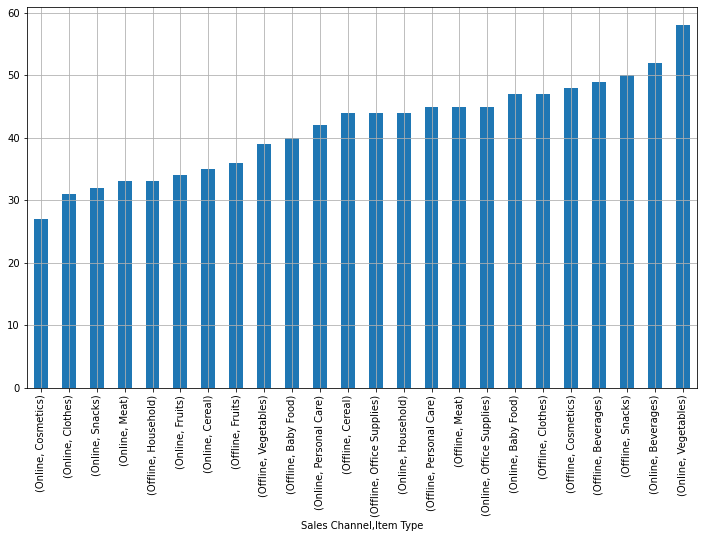

In [14]:
plt.figure(figsize=(12,7))
value_count_channel.plot(kind="bar")
plt.grid()
plt.show()

# the sales of vegetables in online very high(58)
# the sales of Beverages is 2nd highest in offline(49) as well as online(52)
# the sales of Meat and personal care is are same in offline (45)
# the sales of cereals and office supplies are also same in offlline(44)
# the lowerest sale offline is household(33)
# the lowerest sale online is cosmetics(27)

In [15]:
value_count_order=df.groupby("Order Priority")["Sales Channel"].value_counts()
value_count_order

Order Priority  Sales Channel
C               Offline          132
                Online           130
H               Offline          126
                Online           102
L               Online           136
                Offline          132
M               Offline          130
                Online           112
Name: Sales Channel, dtype: int64

In [16]:
df["Unit Cost"].unique()

array([263.33,  90.93, 159.42, 117.11,   6.92,  35.84,  97.44, 502.54,
       524.96,  31.79,  56.67, 364.69])

In [17]:
profit=df["Unit Price"].unique()-df["Unit Cost"].unique()
profit

# below are the profit earned on sale of each item type

array([173.87,  63.13,  95.86,  88.59,   2.41,  73.44,  55.14, 165.73,
       126.25,  15.66,  25.06,  57.2 ])

In [18]:
df.head(10)

# as we can see in the data we dont have per unit profit
# order date and ship date dont have same format in all the rows

# we will find unit profit
# we need to make changes in their formatting

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
5,Europe,Armenia,Cereal,Online,H,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52
6,Sub-Saharan Africa,Eritrea,Cereal,Online,H,03-04-2015,679414975,4/17/2015,2844,205.70,117.11,585010.80,333060.84,251949.96
7,Europe,Montenegro,Clothes,Offline,M,5/17/2012,208630645,6/28/2012,7299,109.28,35.84,797634.72,261596.16,536038.56
8,Central America and the Caribbean,Jamaica,Vegetables,Online,H,1/29/2015,266467225,03-07-2015,2428,154.06,90.93,374057.68,220778.04,153279.64
9,Australia and Oceania,Fiji,Vegetables,Offline,H,12/24/2013,118598544,1/19/2014,4800,154.06,90.93,739488.00,436464.00,303024.00


In [19]:
df["Unit Profit"]=df["Unit Price"]-df["Unit Cost"]
df

# in this data we can see profit of per unit

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,173.87
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34,63.13
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62,95.86
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98,88.59
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45,2.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36,55.14
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68,95.86
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28,63.13
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73,165.73


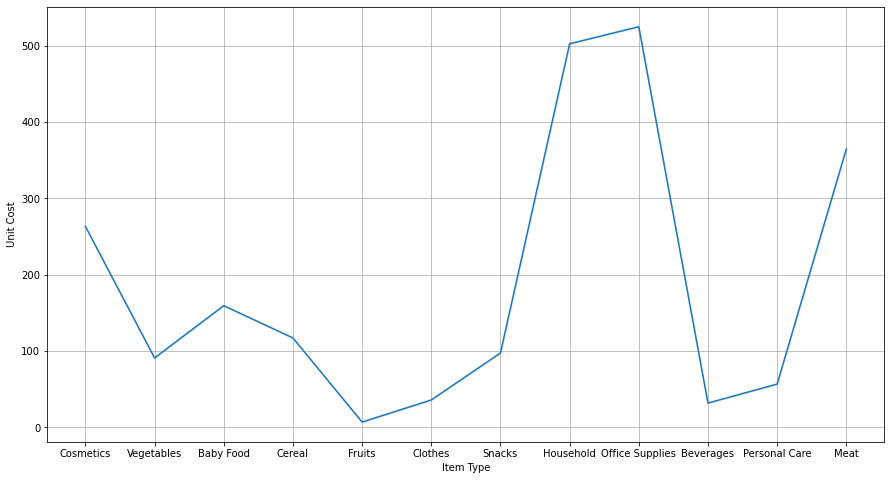

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x="Item Type",y="Unit Cost")
plt.grid()
plt.show()

In [21]:
df["Unit Profit"].unique()

# profit amount of each product

array([173.87,  63.13,  95.86,  88.59,   2.41,  73.44,  55.14, 165.73,
       126.25,  15.66,  25.06,  57.2 ])

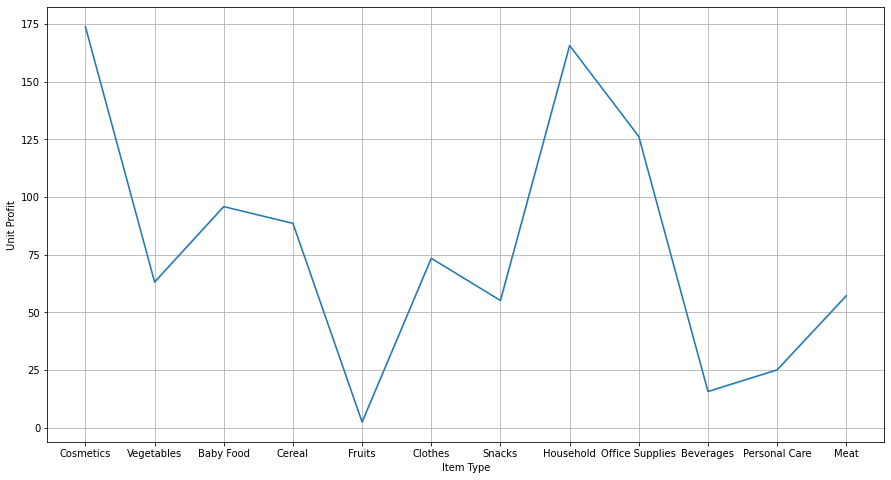

In [22]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x="Item Type",y="Unit Profit")
plt.grid()
plt.show()

# cosmetics, household, office supplies have the highest profit rate for each product sale
# fruits & beverages have the lowest profit rate

In [23]:
df[["Order Date","Ship Date"]] = df[["Order Date","Ship Date"]].apply(pd.to_datetime)
df

# in this data we have change all the order date & ship date in same format

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,2014-10-18,686800706,2014-10-31,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,173.87
1,North America,Canada,Vegetables,Online,M,2011-11-07,185941302,2011-12-08,3018,154.06,90.93,464953.08,274426.74,190526.34,63.13
2,Middle East and North Africa,Libya,Baby Food,Offline,C,2016-10-31,246222341,2016-12-09,1517,255.28,159.42,387259.76,241840.14,145419.62,95.86
3,Asia,Japan,Cereal,Offline,C,2010-04-10,161442649,2010-05-12,3322,205.70,117.11,683335.40,389039.42,294295.98,88.59
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,2011-08-16,645713555,2011-08-31,9845,9.33,6.92,91853.85,68127.40,23726.45,2.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,2010-04-18,534085166,2010-04-25,6524,152.58,97.44,995431.92,635698.56,359733.36,55.14
996,Europe,Georgia,Baby Food,Offline,H,2011-08-01,590768182,2011-09-07,288,255.28,159.42,73520.64,45912.96,27607.68,95.86
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,2011-05-12,524363124,2011-06-28,9556,154.06,90.93,1472197.36,868927.08,603270.28,63.13
998,Europe,Finland,Household,Offline,L,2016-01-25,289606320,2016-02-14,9801,668.27,502.54,6549714.27,4925394.54,1624319.73,165.73


In [24]:
df=df.sort_values(by=["Order Date","Ship Date"])
df=df.reset_index(drop=True)
df

# in the below data we have sorted the data in order date and ship date
# and then we have reset the indexing values of the data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Profit
0,Europe,Monaco,Vegetables,Online,H,2010-01-01,329530894,2010-02-13,4369,154.06,90.93,673088.14,397273.17,275814.97,63.13
1,Europe,Russia,Beverages,Offline,C,2010-01-06,515616118,2010-02-05,1122,47.45,31.79,53238.90,35668.38,17570.52,15.66
2,Europe,Slovakia,Cosmetics,Online,H,2010-01-07,386600577,2010-01-29,2557,437.20,263.33,1117920.40,673334.81,444585.59,173.87
3,Sub-Saharan Africa,Central African Republic,Household,Online,H,2010-01-10,256994950,2010-02-19,9372,668.27,502.54,6263026.44,4709804.88,1553221.56,165.73
4,Sub-Saharan Africa,Ethiopia,Personal Care,Offline,C,2010-01-13,967328870,2010-01-15,2964,81.73,56.67,242247.72,167969.88,74277.84,25.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Australia and Oceania,Marshall Islands,Personal Care,Offline,L,2017-07-09,803517568,2017-07-21,7559,81.73,56.67,617797.07,428368.53,189428.54,25.06
996,Europe,Hungary,Household,Online,L,2017-07-18,306859576,2017-07-19,5423,668.27,502.54,3624028.21,2725274.42,898753.79,165.73
997,Sub-Saharan Africa,Madagascar,Fruits,Online,M,2017-07-23,987714517,2017-09-11,5530,9.33,6.92,51594.90,38267.60,13327.30,2.41
998,Europe,Serbia,Cosmetics,Online,H,2017-07-26,461065137,2017-08-19,8275,437.20,263.33,3617830.00,2179055.75,1438774.25,173.87


In [25]:
df.groupby(pd.Grouper(key="Order Date",axis=0,freq="Y")).count()

# year 2014 has the highest sale (146)
# year 2017 has very low sales (69)
# as we can see their is huge drop in sales of product in year 2017

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Profit
Order Date,,,,,,,,,,,,,,
2010-12-31,140,140,140,140,140,140,140,140,140,140,140,140,140,140
2011-12-31,121,121,121,121,121,121,121,121,121,121,121,121,121,121
2012-12-31,141,141,141,141,141,141,141,141,141,141,141,141,141,141
2013-12-31,137,137,137,137,137,137,137,137,137,137,137,137,137,137
2014-12-31,146,146,146,146,146,146,146,146,146,146,146,146,146,146
2015-12-31,123,123,123,123,123,123,123,123,123,123,123,123,123,123
2016-12-31,123,123,123,123,123,123,123,123,123,123,123,123,123,123
2017-12-31,69,69,69,69,69,69,69,69,69,69,69,69,69,69


In [26]:
df["Year"] = pd.DatetimeIndex(df["Order Date"]).year
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Profit,Year
0,Europe,Monaco,Vegetables,Online,H,2010-01-01,329530894,2010-02-13,4369,154.06,90.93,673088.14,397273.17,275814.97,63.13,2010
1,Europe,Russia,Beverages,Offline,C,2010-01-06,515616118,2010-02-05,1122,47.45,31.79,53238.90,35668.38,17570.52,15.66,2010
2,Europe,Slovakia,Cosmetics,Online,H,2010-01-07,386600577,2010-01-29,2557,437.20,263.33,1117920.40,673334.81,444585.59,173.87,2010
3,Sub-Saharan Africa,Central African Republic,Household,Online,H,2010-01-10,256994950,2010-02-19,9372,668.27,502.54,6263026.44,4709804.88,1553221.56,165.73,2010
4,Sub-Saharan Africa,Ethiopia,Personal Care,Offline,C,2010-01-13,967328870,2010-01-15,2964,81.73,56.67,242247.72,167969.88,74277.84,25.06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Australia and Oceania,Marshall Islands,Personal Care,Offline,L,2017-07-09,803517568,2017-07-21,7559,81.73,56.67,617797.07,428368.53,189428.54,25.06,2017
996,Europe,Hungary,Household,Online,L,2017-07-18,306859576,2017-07-19,5423,668.27,502.54,3624028.21,2725274.42,898753.79,165.73,2017
997,Sub-Saharan Africa,Madagascar,Fruits,Online,M,2017-07-23,987714517,2017-09-11,5530,9.33,6.92,51594.90,38267.60,13327.30,2.41,2017
998,Europe,Serbia,Cosmetics,Online,H,2017-07-26,461065137,2017-08-19,8275,437.20,263.33,3617830.00,2179055.75,1438774.25,173.87,2017


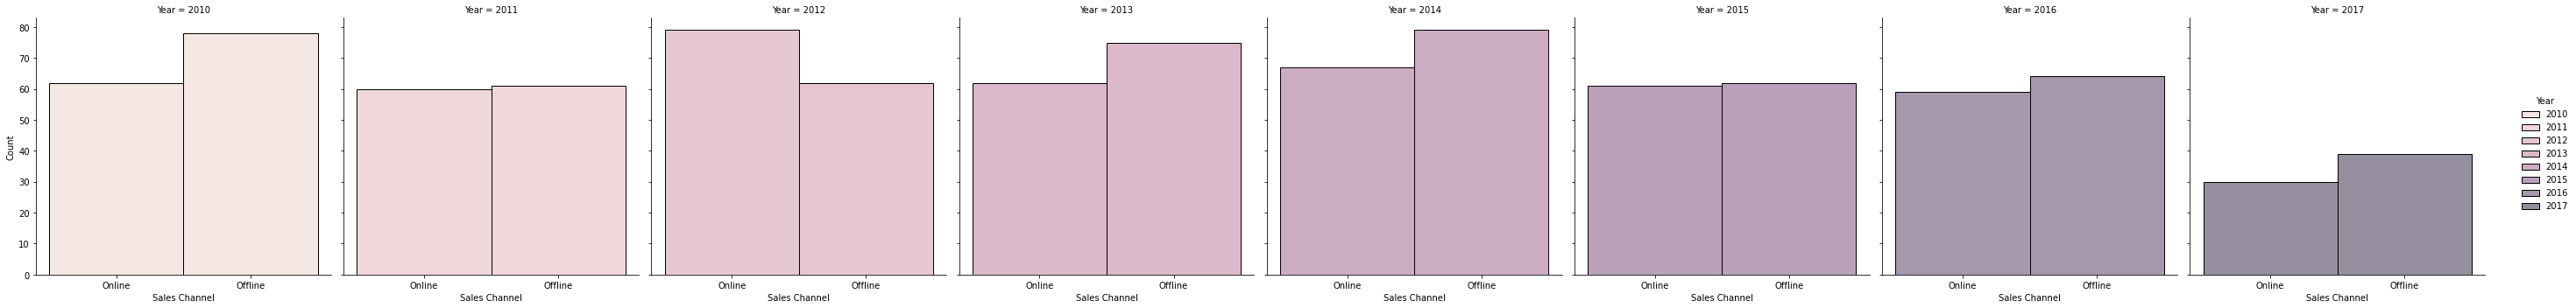

In [27]:
sns.displot(data=df, x="Sales Channel", hue="Year", col="Year")

# yearly sales from 2010 to 2017
# first columns represent online sales
# second columns represent offline sales
# in year 2011 and 2015 the sale of offline and online were almost same

In [28]:
a=df.groupby("Year")[["Sales Channel","Order Priority"]].value_counts().sort_values()
a.head(20)

Year  Sales Channel  Order Priority
2017  Online         C                  6
                     M                  7
                     H                  8
      Offline        M                  8
      Online         L                  9
      Offline        L                  9
                     H                  9
2015  Online         C                  9
2014  Online         H                 10
2013  Online         H                 10
2011  Offline        C                 11
      Online         H                 11
2016  Online         M                 11
2010  Online         M                 12
2012  Offline        C                 12
      Online         H                 12
2017  Offline        C                 13
2010  Online         L                 13
2011  Online         M                 13
2016  Offline        M                 13
dtype: int64

In [29]:
b=df.groupby("Year")["Sales Channel"].value_counts()

In [30]:
b.head(20)

# most highest offine is 79 in year 2014
# most highest online is 79 in year 2012

Year  Sales Channel
2010  Offline          78
      Online           62
2011  Offline          61
      Online           60
2012  Online           79
      Offline          62
2013  Offline          75
      Online           62
2014  Offline          79
      Online           67
2015  Offline          62
      Online           61
2016  Offline          64
      Online           59
2017  Offline          39
      Online           30
Name: Sales Channel, dtype: int64

In [31]:
df.groupby("Item Type")["Region"].value_counts()

Item Type   Region                           
Baby Food   Europe                               24
            Sub-Saharan Africa                   24
            Asia                                 13
            Middle East and North Africa         13
            Central America and the Caribbean     6
                                                 ..
Vegetables  Middle East and North Africa         15
            Asia                                 11
            Australia and Oceania                 9
            Central America and the Caribbean     8
            North America                         2
Name: Region, Length: 82, dtype: int64

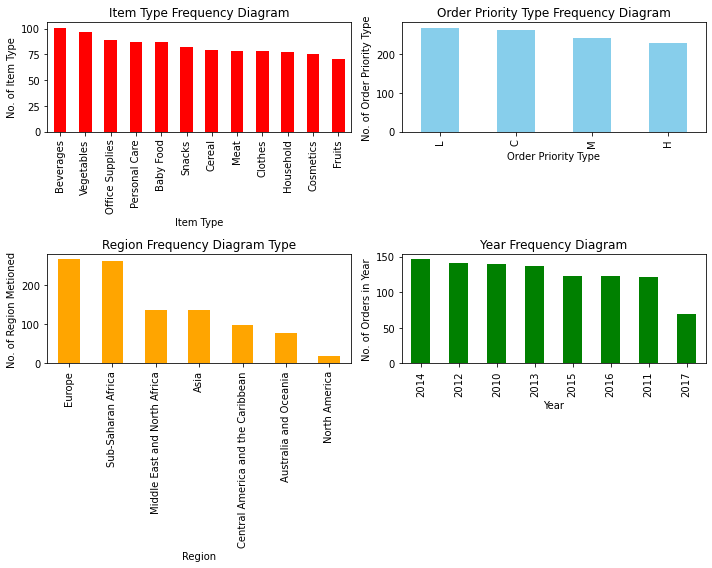

In [32]:
plt.figure(1)
plt.subplot(2,2,1)

df["Item Type"].value_counts().plot(figsize=(10,8),kind="bar",color="red")
plt.title("Item Type Frequency Diagram")
plt.ylabel("No. of Item Type")
plt.xlabel("Item Type")

# below chart is count of items type sale in years from 2010 to 2017
# most sale item is beverages
# lowest sale item is fruits

plt.subplot(2,2,2)
df["Order Priority"].value_counts().plot(figsize=(10,8),kind="bar",color="skyblue")
plt.title("Order Priority Type Frequency Diagram")
plt.ylabel("No. of Order Priority Type")
plt.xlabel("Order Priority Type")

# L has the most order type
# H has the least order type

plt.subplot(2,2,3)
df["Region"].value_counts().plot(figsize=(10,8),kind="bar",color="orange")
plt.title("Region Frequency Diagram Type")
plt.ylabel("No. of Region Metioned")
plt.xlabel("Region")

# the data has the highest number of entries of Europe region,
# followed by Sub-Saharan Africa
# the lowest number of data entries is North America

plt.subplot(2,2,4)
df["Year"].value_counts().plot(figsize=(10,8),kind="bar",color="green")
plt.title("Year Frequency Diagram")
plt.ylabel("No. of Orders in Year")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# the yearly sales data
# Year 2014 has the most highest sale value
# Year 2027 has the lowest sale

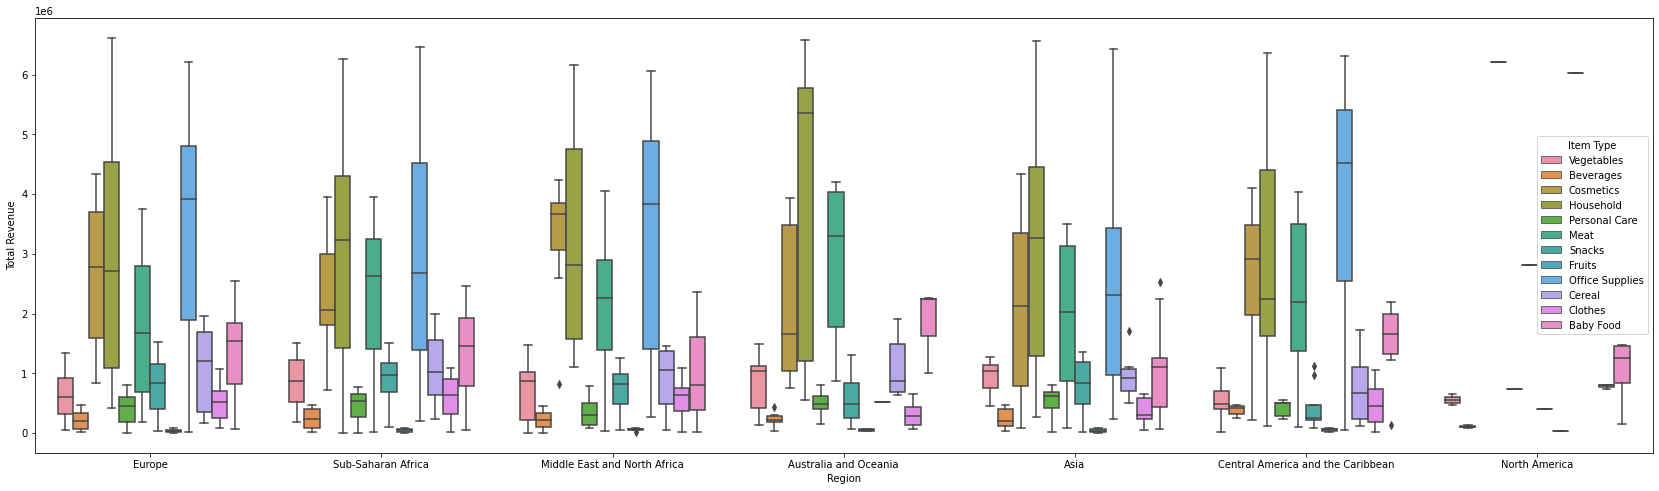

In [33]:
plt.figure(figsize=(29,8))
sns.boxplot(data=df,x="Region",y="Total Revenue",hue="Item Type")
plt.show()

# the data below shows Items Total Revenue distrubuted according to the region
# North America has the lowest revenue of all the items

# Outliers Regions
 # Middle east and north africa (cosmetics & fruits)
 # Asia (baby food & cereal)
 # Central America and the Caribbean(baby food & snacks)
 # Australia and Oceania (beverages)

In [34]:
Total_Profit_mean = df.groupby("Item Type")["Total Profit"].mean().sort_values()
Total_Profit_mean

# Mean from total profit of each product is mention below with product names

Item Type
Fruits              12226.446429
Beverages           78285.270297
Personal Care      137030.384368
Snacks             265710.245854
Meat               299137.666667
Vegetables         306718.081237
Clothes            355888.356923
Cereal             434818.783671
Baby Food          481082.775632
Office Supplies    630515.196629
Household          798500.054026
Cosmetics          987748.515200
Name: Total Profit, dtype: float64

In [35]:
value_count_order=df.groupby("Order Priority")["Sales Channel"].value_counts()
value_count_order

# checking the sales by order priority for online & offline

Order Priority  Sales Channel
C               Offline          132
                Online           130
H               Offline          126
                Online           102
L               Online           136
                Offline          132
M               Offline          130
                Online           112
Name: Sales Channel, dtype: int64

In [36]:
Total_Revenue_item=df.groupby("Item Type")["Total Revenue"].sum().sort_values()
Total_Revenue_item

# checking the total revenue of each item

Item Type
Fruits             3.313316e+06
Beverages          2.395774e+07
Personal Care      3.888092e+07
Clothes            4.130631e+07
Snacks             6.029107e+07
Vegetables         7.260478e+07
Cereal             7.975997e+07
Baby Food          1.114598e+08
Meat               1.720953e+08
Cosmetics          1.862787e+08
Household          2.479228e+08
Office Supplies    2.894511e+08
Name: Total Revenue, dtype: float64

In [37]:
Total_Revenue_region=df.groupby("Region")["Total Revenue"].sum().sort_values()
Total_Revenue_region

# total revenue for each region

Region
North America                        2.496160e+07
Australia and Oceania                1.056896e+08
Central America and the Caribbean    1.439976e+08
Asia                                 1.676748e+08
Middle East and North Africa         1.751065e+08
Europe                               3.531675e+08
Sub-Saharan Africa                   3.567243e+08
Name: Total Revenue, dtype: float64

<Figure size 432x288 with 0 Axes>

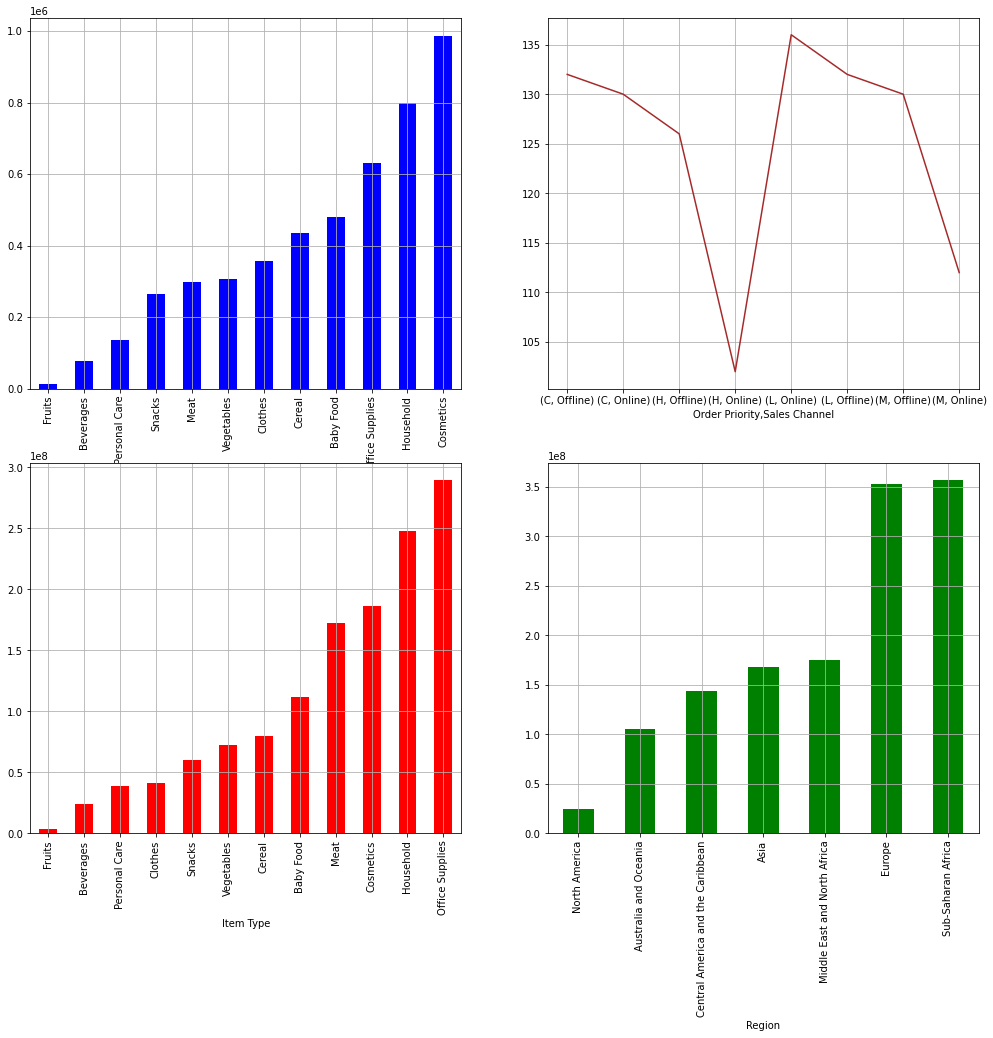

In [38]:
plt.figure(2)
plt.figure(figsize=(17,15))

plt.subplot(2,2,1)
Total_Profit_mean.plot(kind="bar",color="blue")
plt.grid()

plt.subplot(2,2,2)
value_count_order.plot(x="Order Priority",y="Sales Channel",kind="line",color="brown")
plt.grid()

# for offline C & L have the highest order priority (132)
# for onlinne L have the highest order priority (136)
# H has the lowest order priority in online(102) as well as offline(126)

plt.subplot(2,2,3)
Total_Revenue_item.plot(kind="bar",color="red")
plt.grid()

plt.subplot(2,2,4)
Total_Revenue_region.plot(kind="bar",color="green")
plt.grid()

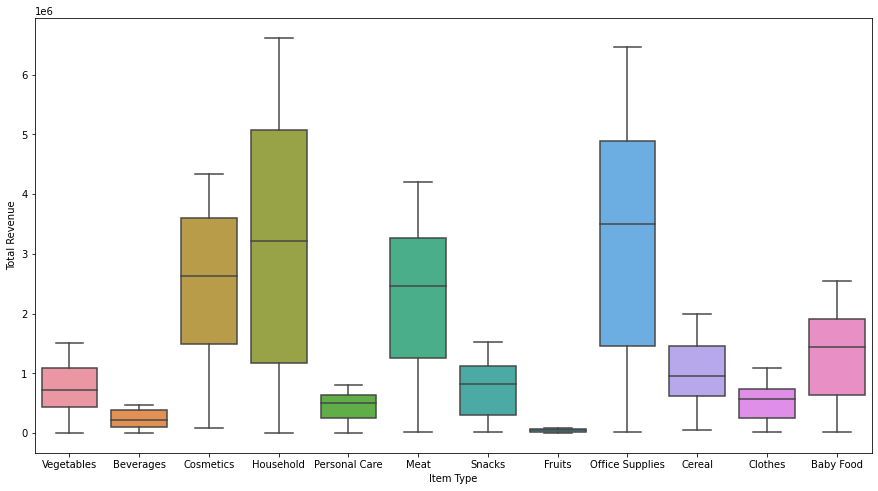

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x="Item Type",y="Total Revenue")
plt.show()

Text(0, 0.5, 'Order Priority Types')

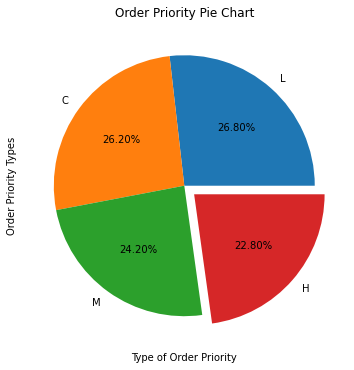

In [40]:
explode=[0,0,0,0.1]
df["Order Priority"].value_counts().plot(figsize=(6,6),kind="pie",autopct="%.2f%%",explode=explode)
plt.title("Order Priority Pie Chart")
plt.xlabel("Type of Order Priority")
plt.ylabel("Order Priority Types")

# the pie diagram below is use to show the order priority percentage
# the most order priority is "L" i.e. 26.80%
# the lowest order priority is "H" i.e. 22.80%

In [41]:
df.corr()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Profit,Year
Order ID,1.000000,0.010266,-0.033436,-0.035550,-0.022079,-0.025629,-0.007886,-0.019207,0.042390
Units Sold,0.010266,1.000000,0.004212,0.002574,0.527945,0.479713,0.591957,0.008886,0.012541
Unit Price,-0.033436,0.004212,1.000000,0.986735,0.730752,0.745538,0.572235,0.834262,0.076529
Unit Cost,-0.035550,0.002574,0.986735,1.000000,0.717999,0.753678,0.498156,0.733686,0.071020
Total Revenue,-0.022079,0.527945,0.730752,0.717999,1.000000,0.987779,0.881429,0.620028,0.037157
Total Cost,-0.025629,0.479713,0.745538,0.753678,0.987779,1.000000,0.797041,0.560740,0.030375
Total Profit,-0.007886,0.591957,0.572235,0.498156,0.881429,0.797041,1.000000,0.703214,0.051925
Unit Profit,-0.019207,0.008886,0.834262,0.733686,0.620028,0.560740,0.703214,1.000000,0.079106
Year,0.042390,0.012541,0.076529,0.071020,0.037157,0.030375,0.051925,0.079106,1.000000


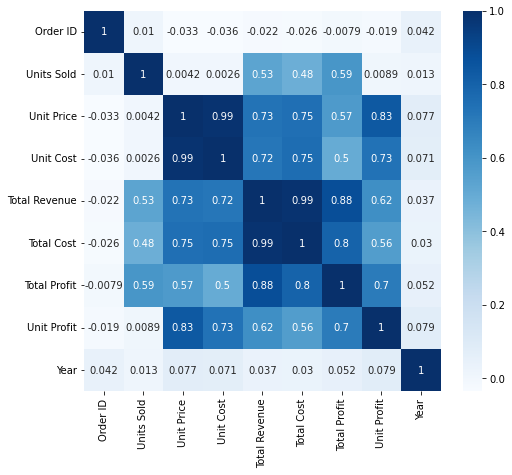

In [42]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()